In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# format digits to  2 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

# set chart layout
sns.set(style="whitegrid")

# figure layout
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# load the data
ecom_customers = pd.read_csv(r'C:\Users\adibb\OneDrive\Desktop\Projects\data\Ecommerce_customers.csv')

In [4]:
# print the head
ecom_customers.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.4973,12.6557,39.5777,4.0826,587.9511
1,DarkGreen,31.9263,11.1095,37.2690,2.6640,392.2049
2,Bisque,33.0009,11.3303,37.1106,4.1045,487.5475
3,SaddleBrown,34.3056,13.7175,36.7213,3.1202,581.8523
4,MediumAquaMarine,33.3307,12.7952,37.5367,4.4463,599.4061


In [5]:
# check num of rows and columns
ecom_customers.shape

(500, 6)

In [6]:
# print out col names
ecom_customers.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
# check for missing values
ecom_customers.isnull().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
# check dtypes
ecom_customers.dtypes

Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [9]:
# check information about data
ecom_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avatar                500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       500 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


# Exploratory Data Analysis (EDA)

In [10]:
# basic descritive statistics for numeric data
ecom_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0000,33.0532,0.9926,29.5324,32.3418,33.0820,33.7120,36.1397
Time on App,500.0000,12.0525,0.9942,8.5082,11.3882,11.9832,12.7538,15.1270
Time on Website,500.0000,37.0604,1.0105,33.9138,36.3493,37.0694,37.7164,40.0052
Length of Membership,500.0000,3.5335,0.9993,0.2699,2.9304,3.5340,4.1265,6.9227
Yearly Amount Spent,500.0000,499.3140,79.3148,256.6706,445.0383,498.8879,549.3138,765.5185


In [11]:
# basic descritive statistics for categorical data
ecom_customers.describe(include='object').T

,count,unique,top,freq
Avatar,500,138,SlateBlue,7


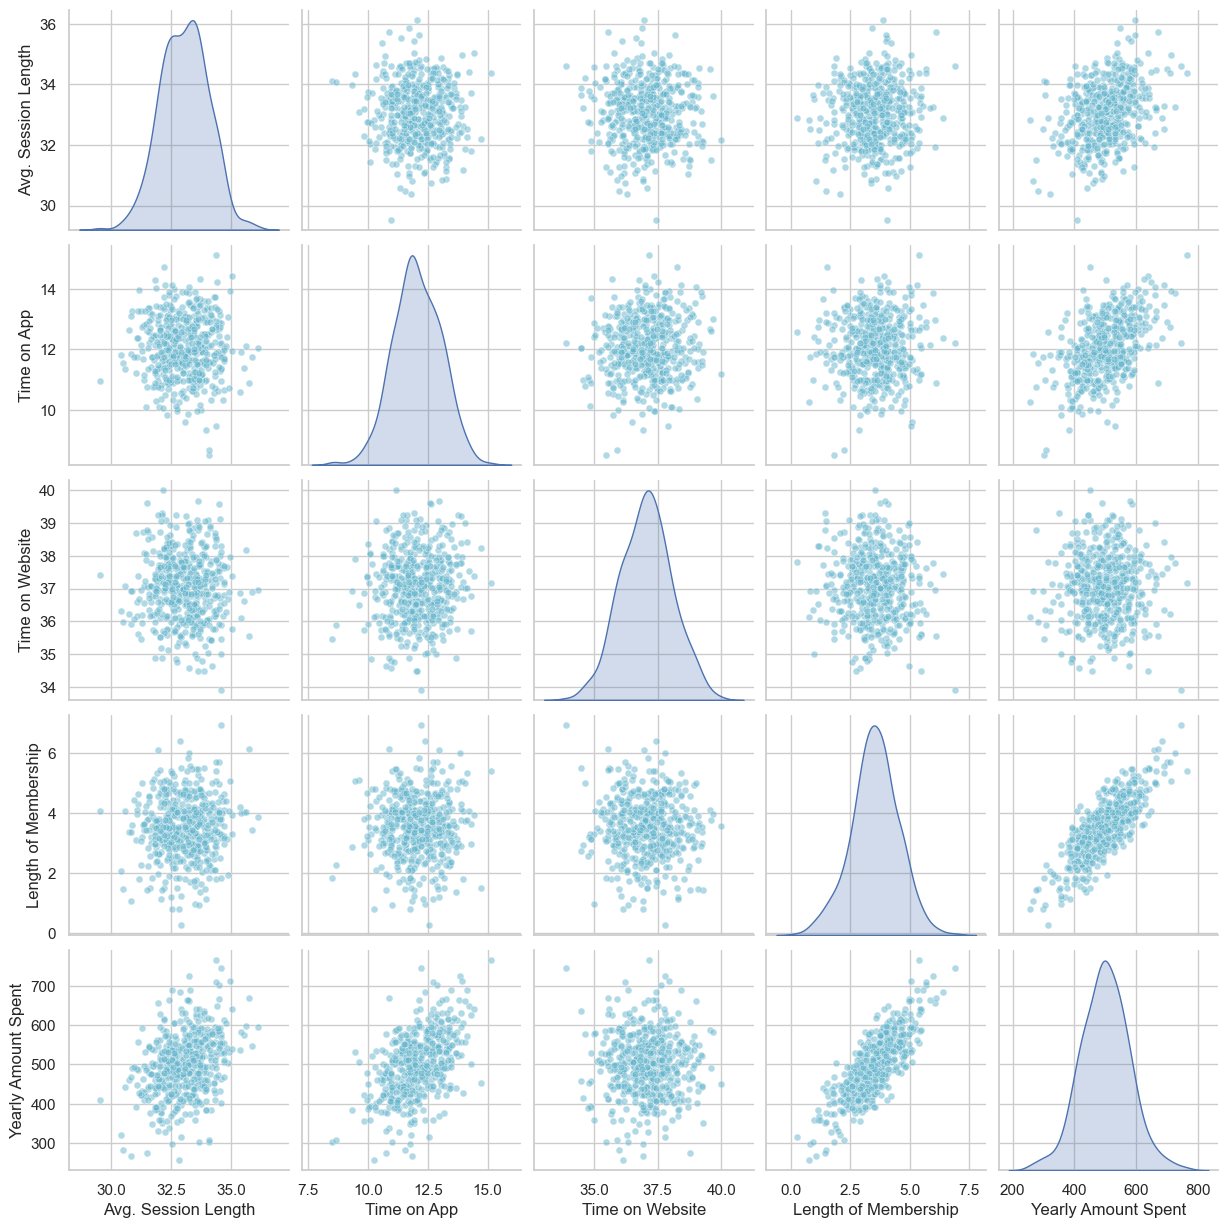

In [12]:
# Plot pairplot
sns.pairplot(ecom_customers, 
             diag_kind="kde",
             plot_kws=dict(s=25, 
             linewidth=0.5,
             **{"alpha": 0.5,
                "color": "c"}))
plt.show()

In [13]:
# Calculate correlation
corr_matrix = ecom_customers.loc[:, 'Avg. Session Length':'Yearly Amount Spent'].corr()*100
corr_matrix 

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,100.0000,-2.7826,-3.4987,6.0247,35.5088
Time on App,-2.7826,100.0000,8.2388,2.9143,49.9328
Time on Website,-3.4987,8.2388,100.0000,-4.7582,-0.2641
Length of Membership,6.0247,2.9143,-4.7582,100.0000,80.9084
Yearly Amount Spent,35.5088,49.9328,-0.2641,80.9084,100.0000


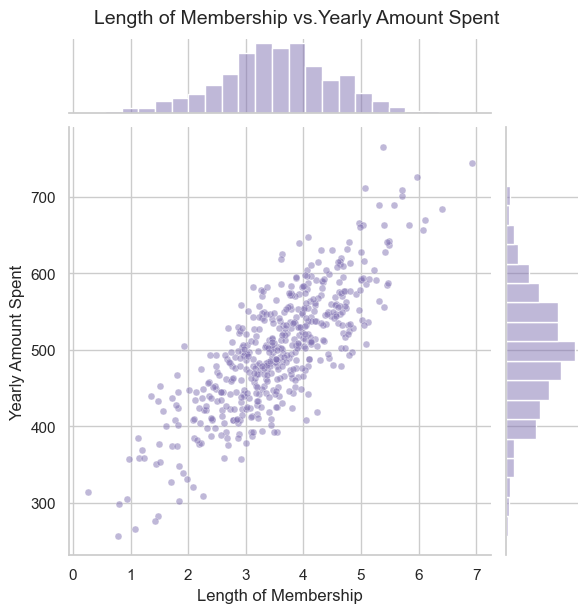

In [14]:
#  Jointplot: Length of Membership vs Yearly Amount Spent.
# Customize the joint plot
sns.jointplot(x="Length of Membership",
              y="Yearly Amount Spent",
              data=ecom_customers,
              kind='scatter',
              color='m', 
              marker='o',
              s=25,
              alpha=0.5,
              joint_kws=dict(alpha=0.5),
              marginal_kws=dict( alpha=0.5))
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.suptitle("Length of Membership vs.Yearly Amount Spent",fontsize=14, y=1.02)
plt.show()

+ It can be observed that there is a positive correlation between length of membership and yearly amount spent.

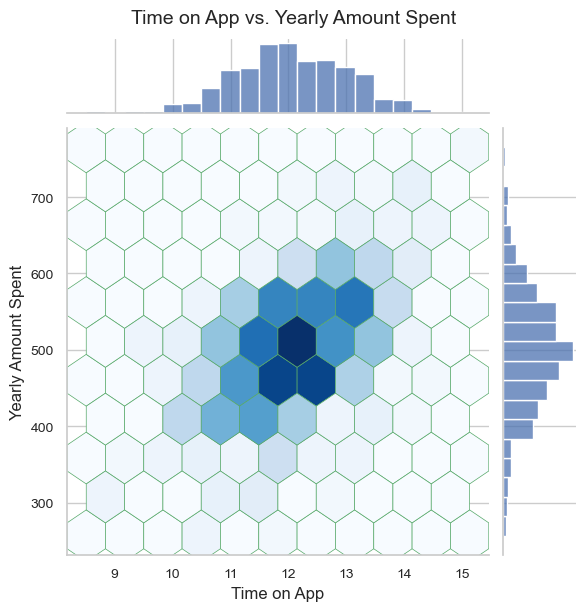

In [15]:
plot = sns.jointplot(x="Time on App",
                     y="Yearly Amount Spent",
                     data=ecom_customers,
                     kind='hex',
                     cmap='Blues',  
                     edgecolor='g',  
                     linewidth=0.5,  
                     space=0.2,      
                     gridsize=10)    
plot.fig.suptitle("Time on App vs. Yearly Amount Spent", fontsize=14, y=1.02)
plot.set_axis_labels("Time on App", "Yearly Amount Spent", fontsize=12)
plot.ax_joint.tick_params(labelsize=10)
plt.show()


+ As seen darker blues indicate higher density of data points.

# Machine Learning

In [16]:
# load ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Prepare the data

In [17]:
# Features
X = ecom_customers.loc[:, 'Avg. Session Length':'Length of Membership'] 

# Target variable
y = ecom_customers['Yearly Amount Spent']

#### Split the Data into Training and Testing Sets

In [18]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Create and Train the Linear Regression Model

In [19]:
# Create the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

#### Make Predictions and Evaluate the Model

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 109.86374115216104
Mean Absolute Error: 8.558441887438075
Root Mean Squared Error: 10.481590583120534
R-squared: 0.9778130629248284


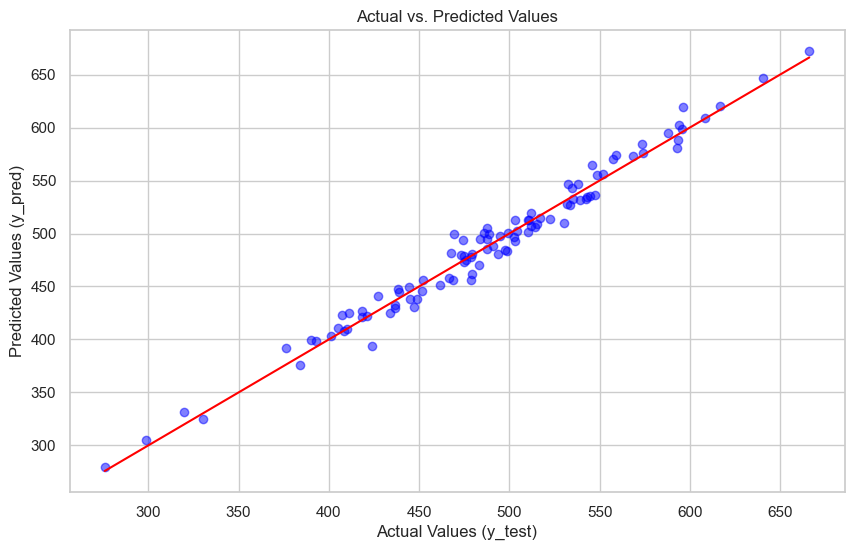

In [21]:
# Plot the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')

# Add the regression line
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x 
plt.plot(line_x, line_y, color='red')

plt.show()

#### Model Features

In [22]:
# Model intercept / slope
intercept = model.intercept_
print(intercept)

# Model coefficients
model_coef = model.coef_
print(model_coef)

-1044.2574142652584
[25.59625911 38.78534599  0.31038592 61.89682859]


In [23]:
# Create a DataFrame to store the coefficients
coeff_df = pd.DataFrame(model_coef,
                        index=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'],
                        columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.5963
Time on App,38.7853
Time on Website,0.3104
Length of Membership,61.8968


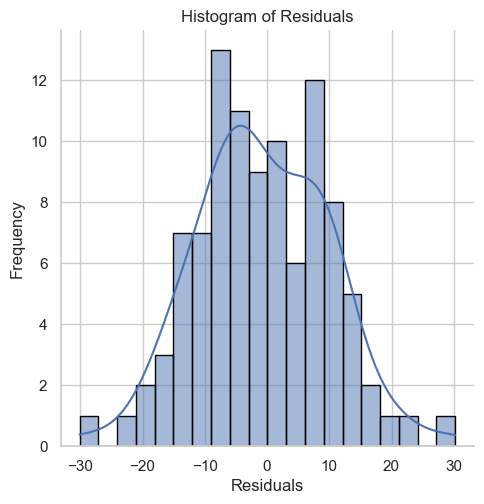

In [24]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the histogram of residuals
sns.displot(residuals, bins=20, edgecolor='black', kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [25]:
# Predictions values
print(y_pred)

[402.86230057 542.53325699 426.62011885 501.91386356 409.6666551
 569.92155028 531.50423545 505.9430922  408.10378587 473.45942926
 441.18668799 424.5246348  424.83341708 527.1206153  430.87985559
 423.47062036 575.87515158 484.65633286 457.77896999 481.58742323
 501.56110987 513.12815204 507.49166902 646.6337734  449.70050598
 496.26290483 556.18523772 554.78684176 399.15827822 325.16921297
 532.62732674 477.73025394 500.76491543 305.09971367 505.4681192
 483.52069434 519.09464127 437.75549728 456.25005223 470.63517887
 494.11207815 444.65549261 508.57079733 500.88197487 488.35128708
 535.34025214 594.58301787 513.59474399 279.69877679 432.71590808
 421.06976167 480.94327504 584.59481871 608.61734067 564.42312999
 494.47224491 393.9559332  456.11321347 572.92228418 499.27385679
 512.4297352  391.5617032  479.60705887 481.05023236 474.71926109
 546.37716062 430.11675681 601.91418143 422.26508503 493.11622459
 528.10614877 581.06630861 620.60774522 512.47838621 411.21474629
 498.0709536

#### Interpret the results


+ The model seems to be performing very well, given the high R-squared value and relatively low errors. It is capturing about 97.8% of the variance in the Yearly Amount Spent, which is a strong indicator of a well-fitted model.
+ The residuals values are centered around zero, indicating that the model's predictions are, on average, close to the actual values. Moreover, the distribution of residuals appears to be nearly normal, which suggests that the model's errors are approximately symmetrically distributed.
+ Avg. Session Length: For every one-unit increase in the average session length, there is an expected increase of $25.60 in the Yearly Amount Spent, assuming all other variables remain constant.
+ Time on App: For every one-unit increase in the time spent on the mobile app, there is an expected increase of $38.79 in the Yearly Amount Spent, assuming all other variables remain constant.
+ Time on Website: For every one-unit increase in the time spent on the website, there is an expected increase of $0.31 in the Yearly Amount Spent, assuming all other variables remain constant.
+ Length of Membership: For every one-unit increase in the length of membership, there is an expected increase of $61.90 in the Yearly Amount Spent, assuming all other variables remain constant.

#### Conclusion:
+ Based on the results, the length of membership has the most significant impact on the Yearly Amount Spent, followed by time spent on the mobile app and the average session length. Time spent on the website has a much smaller impact compared to other factors. To decide whether this company should focus more on their mobile app or website, one would need additional context and business goals. However, based on the coefficient results, the mobile app seems to have a stronger positive impact on the Yearly Amount Spent compared to the website. Therefore, the company might consider investing more in improving the mobile app to potentially increase customer spending.